In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
df_speeches = pd.read_csv('../data/wps_speeches.csv')
df_speeches

,text,year,filename,only text,speaker,country/organization,language,gender
0,The President: I should like to inform the Cou...,2000,UNSC_2000_SPV.4208_spch001.txt,I should like to inform the Council that I ha...,The President,NaN,English,u
1,The Secretary-General: Let me thank and congra...,2000,UNSC_2000_SPV.4208_spch002.txt,Let me thank and congratulate the presidency ...,The Secretary-General,NaN,English,u
2,The President: The next speaker on my list is ...,2000,UNSC_2000_SPV.4208_spch003.txt,The next speaker on my list is Ms. Angela Kin...,The President,NaN,English,u
3,"Ms. King: I am particularly honoured today, as...",2000,UNSC_2000_SPV.4208_spch004.txt,"I am particularly honoured today, as Special ...",Ms. King,NaN,English,m
4,The President: I thank Ms. King for her kind w...,2000,UNSC_2000_SPV.4208_spch005.txt,I thank Ms. King for her kind words addressed...,The President,NaN,English,u
...,...,...,...,...,...,...,...,...
4663,The President: I thank the representative of S...,2019,UNSC_2019_SPV.8657_spch021.txt,I thank the representative of South Africa fo...,The President,NaN,English,u
4664,The Deputy Secretary-General: I would like to ...,2019,UNSC_2019_SPV.8657_spch022.txt,I would like to once again express my deep ap...,The Deputy Secretary-General,NaN,English,u
4665,The President: I thank the Deputy Secretary- G...,2019,UNSC_2019_SPV.8657_spch023.txt,I thank the Deputy Secretary- General for the...,The President,NaN,English,u
4666,"Ms. Mohammed: Before I comment, I would like t...",2019,UNSC_2019_SPV.8657_spch024.txt,"Before I comment, I would like to say that it...",Ms. Mohammed,NaN,English,f


In [107]:
permanent_members = ["China", "France", "Russian Federation", "United Kingdom", "United States of America"]

gender_colors = {'m': 'pink', 'f': 'blue'}

In [106]:
gender_distribution = df_speeches.groupby(['year', 'gender']).size().unstack(fill_value=0)
unique_speakers_list_per_year = df_speeches.groupby('year')['speaker'].unique()

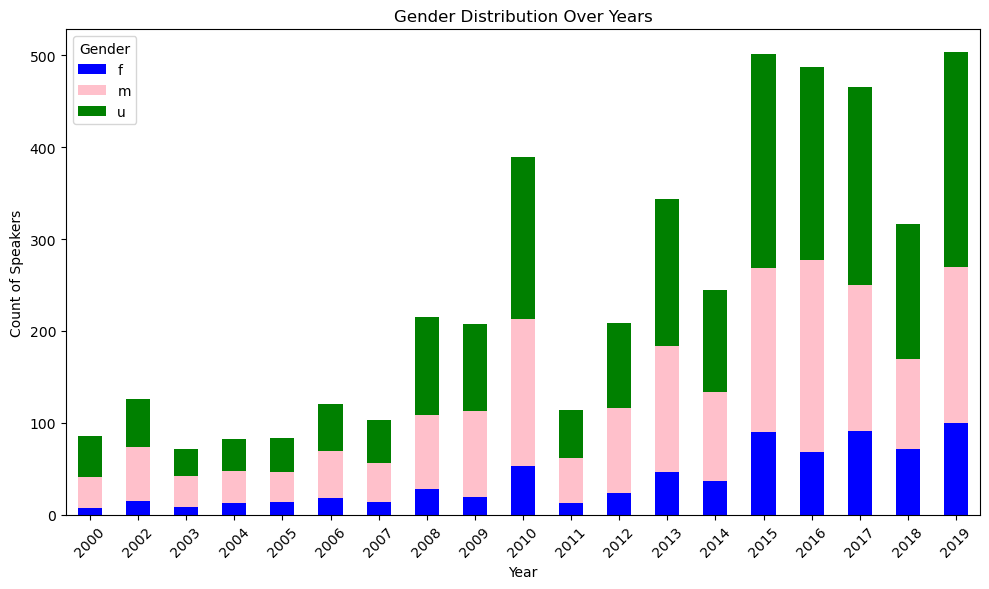

In [109]:
gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=[gender_colors.get(g, 'green') for g in gender_distribution.columns])

plt.title('Gender Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count of Speakers')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Normalized Country Distribution (Percentages):
country/organization      China     France  Russian Federation  \
year                                                             
2000                  20.000000  20.000000           20.000000   
2002                  20.000000  20.000000           20.000000   
2003                  25.000000  25.000000           25.000000   
2004                  25.000000  25.000000           25.000000   
2005                  20.000000  20.000000           20.000000   
2006                  22.222222  22.222222           22.222222   
2007                  20.000000  20.000000           20.000000   
2008                  12.500000  25.000000           25.000000   
2009                  23.076923  23.076923           23.076923   
2010                  20.000000  20.000000           24.000000   
2011                  20.000000  20.000000           20.000000   
2012                  22.222222  22.222222           22.222222   
2013                  21.4285

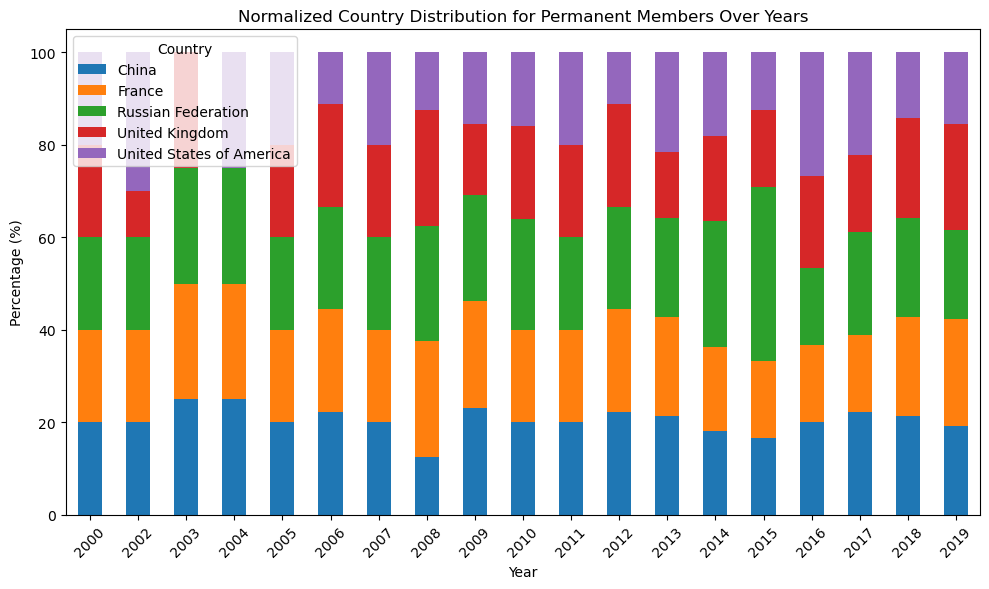

In [94]:
# Group by year and country/organization, then count occurrences
country_distribution = df_speeches.groupby(['year', 'country/organization']).size().unstack(fill_value=0)
# check only for permanent members
filtered_permanent_members = country_distribution[permanent_members]

# normalize per year
normalized_data = filtered_permanent_members.div(filtered_permanent_members.sum(axis=1), axis=0) * 100

print("Normalized Country Distribution (Percentages):")
print(normalized_data)

normalized_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Normalized Country Distribution for Permanent Members Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()

plt.show()

Normalized Gender Distribution (Percentages):
gender          f          m          u
year                                   
2000     8.139535  39.534884  52.325581
2002    11.904762  46.825397  41.269841
2003    11.111111  47.222222  41.666667
2004    15.853659  42.682927  41.463415
2005    16.867470  38.554217  44.578313
2006    14.876033  42.148760  42.975207
2007    13.592233  40.776699  45.631068
2008    13.023256  37.674419  49.302326
2009     9.134615  45.192308  45.673077
2010    13.624679  41.131105  45.244216
2011    11.403509  42.982456  45.614035
2012    11.483254  44.019139  44.497608
2013    13.662791  39.825581  46.511628
2014    15.163934  39.344262  45.491803
2015    17.964072  35.728543  46.307385
2016    13.963039  42.915811  43.121150
2017    19.569892  34.193548  46.236559
2018    22.784810  30.696203  46.518987
2019    19.880716  33.797217  46.322068


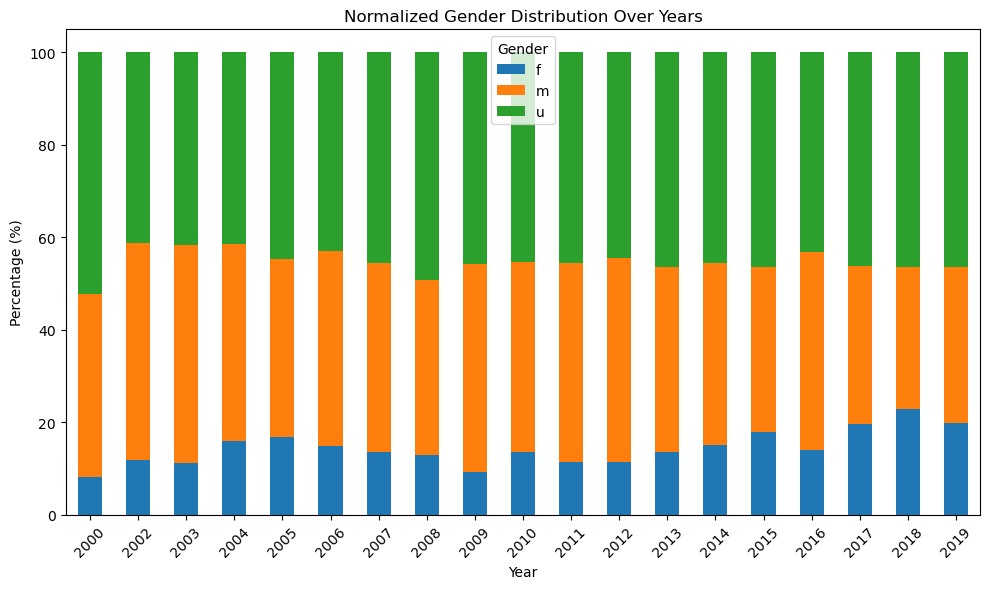

In [102]:
# Group by year and gender, then count occurrences
gender_distribution = df_speeches.groupby(['year', 'gender']).size().unstack(fill_value=0)

# normalize per year
normalized_data = gender_distribution.div(gender_distribution.sum(axis=1), axis=0) * 100

print("Normalized Gender Distribution (Percentages):")
print(normalized_data)

normalized_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Normalized Gender Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

plt.show()

<Figure size 1000x600 with 0 Axes>

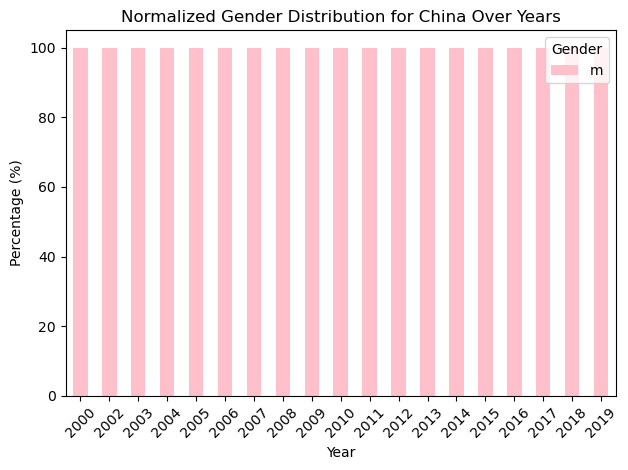

<Figure size 1000x600 with 0 Axes>

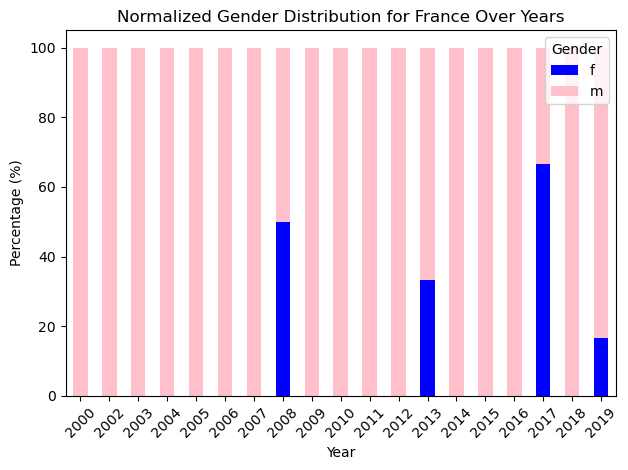

<Figure size 1000x600 with 0 Axes>

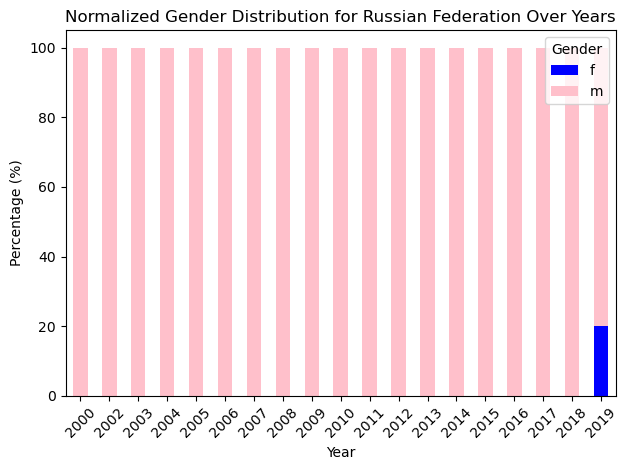

<Figure size 1000x600 with 0 Axes>

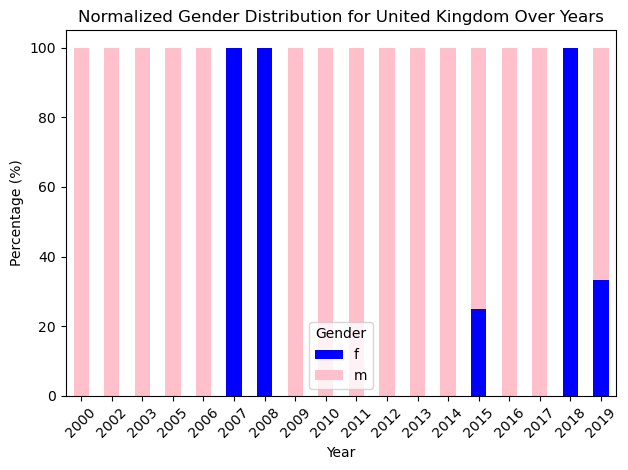

<Figure size 1000x600 with 0 Axes>

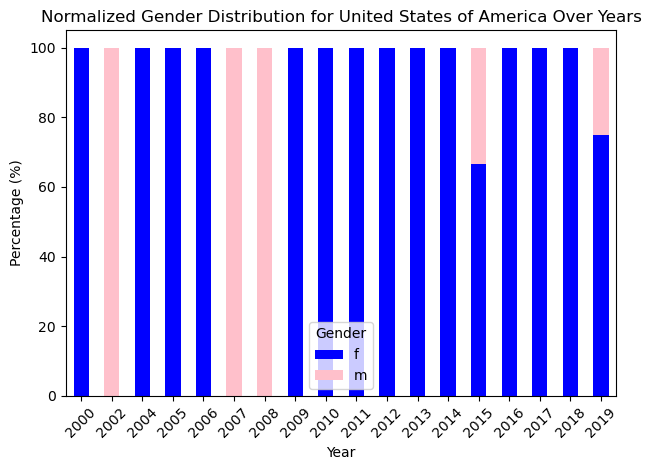

In [104]:
# Filter the speeches for permanent members and include gender and country
df_filtered = df_speeches[df_speeches['country/organization'].isin(permanent_members)]

# Create subplots for each permanent country
for country in permanent_members:
    country_data = df_filtered[df_filtered['country/organization'] == country]

    gender_distribution_country = country_data.groupby(['year', 'gender']).size().unstack(fill_value=0)

    normalized_gender_distribution_country = gender_distribution_country.div(gender_distribution_country.sum(axis=1), axis=0) * 100

    plt.figure(figsize=(10, 6))
    normalized_gender_distribution_country.plot(kind='bar', stacked=True, color=[gender_colors.get(g, 'gray') for g in normalized_gender_distribution_country.columns])

    plt.title(f'Normalized Gender Distribution for {country} Over Years')
    plt.xlabel('Year')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Gender')
    plt.tight_layout()

    plt.show()


Normalized Gender Distribution by Country (Percentages):
gender                            f           m
country/organization                           
China                      0.000000  100.000000
France                    10.416667   89.583333
Russian Federation         1.818182   98.181818
United Kingdom            20.000000   80.000000
United States of America  83.720930   16.279070


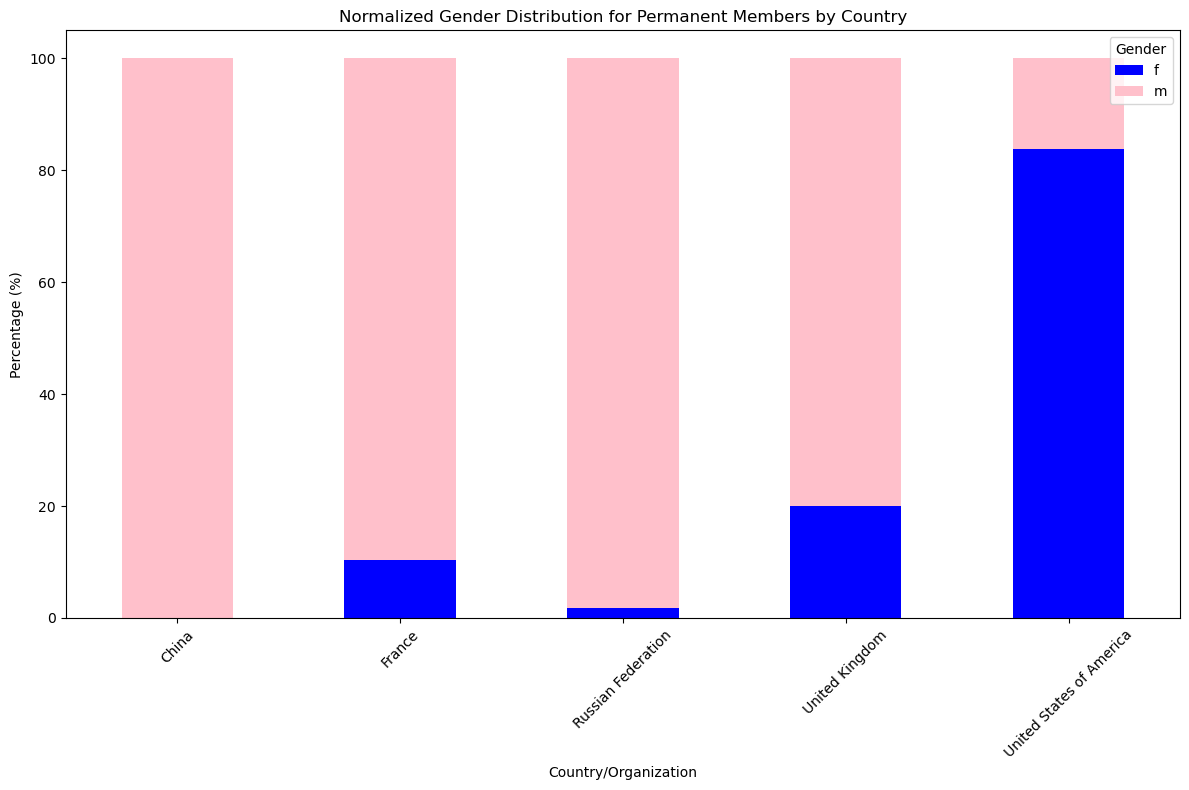

In [105]:
gender_country_distribution = df_filtered.groupby(['country/organization', 'gender']).size().unstack(fill_value=0)

# Normalize the data by country (to get percentages)
normalized_gender_country_data = gender_country_distribution.div(gender_country_distribution.sum(axis=1), axis=0) * 100

# Print normalized data (percentage distribution)
print("Normalized Gender Distribution by Country (Percentages):")
print(normalized_gender_country_data)

# Plotting the normalized gender distribution by country
normalized_gender_country_data.plot(kind='bar', stacked=True, figsize=(12, 8), color=[gender_colors.get(g, 'gray') for g in normalized_gender_distribution_country.columns])

plt.title('Normalized Gender Distribution for Permanent Members by Country')
plt.xlabel('Country/Organization')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

plt.show()
